<a href="https://colab.research.google.com/github/amit112763/Pong/blob/main/bike_sharing(new).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving day[1].csv to day[1].csv


In [ ]:
import pandas as pd
df = pd.read_csv('day[1].csv')
# Check the first few rows to understand the data
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.isnull().any()
df.isnull().sum()
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(731, 16)

In [ ]:
# Drop unnecessary columns
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# If there are no missing values, we proceed with the feature scaling
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('cnt', axis=1)  # Features
y = df['cnt']  # Target

# Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now, we have scaled features X_scaled and target y ready for modeling


Missing values:
 season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split sizes
print(f"Training data size: {X_train.shape}, Test data size: {X_test.shape}")


Training data size: (584, 11), Test data size: (147, 11)


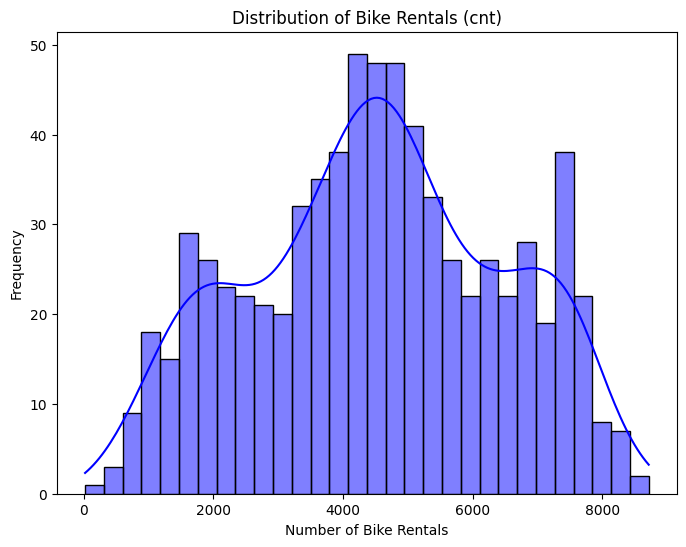

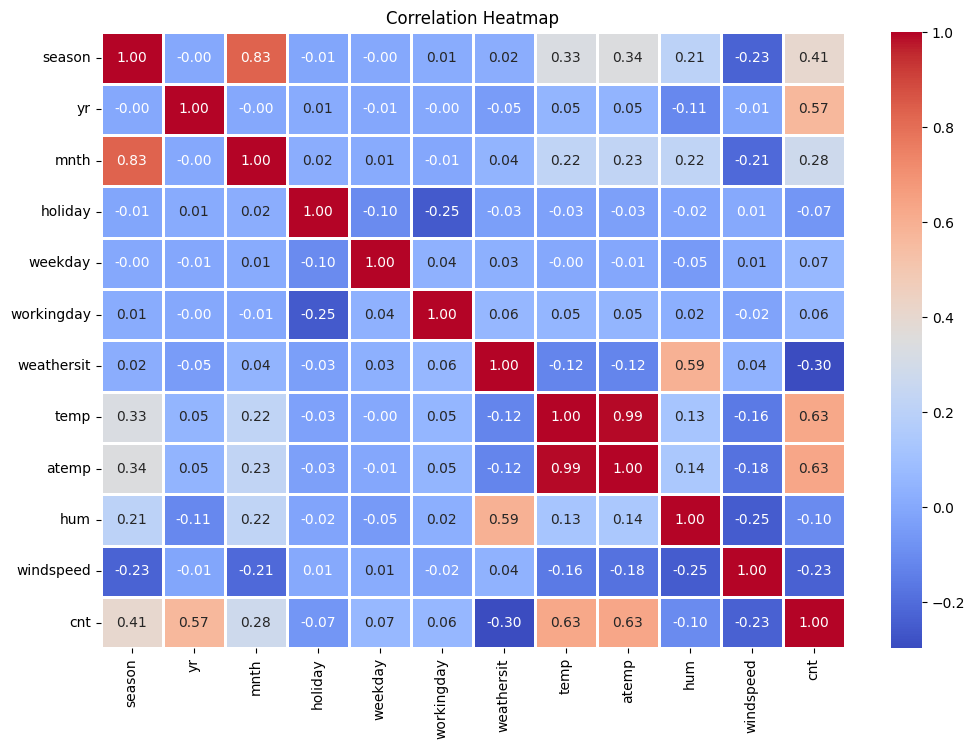

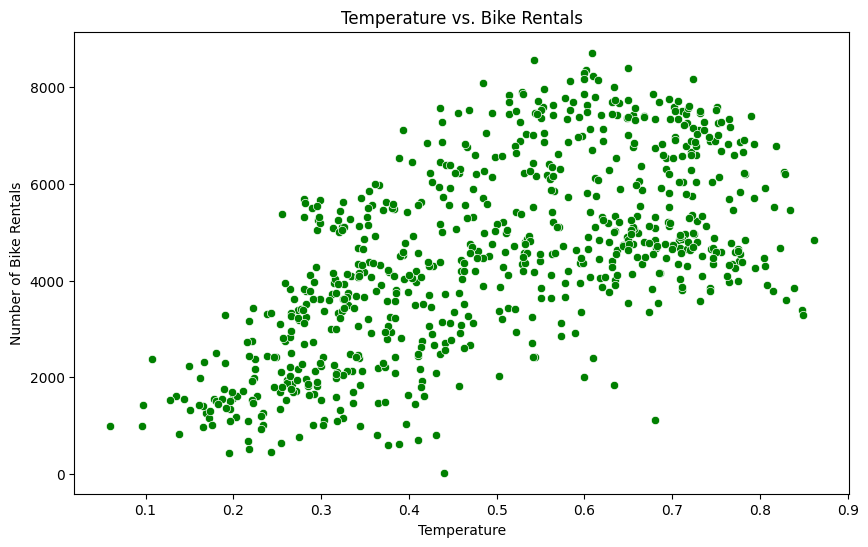

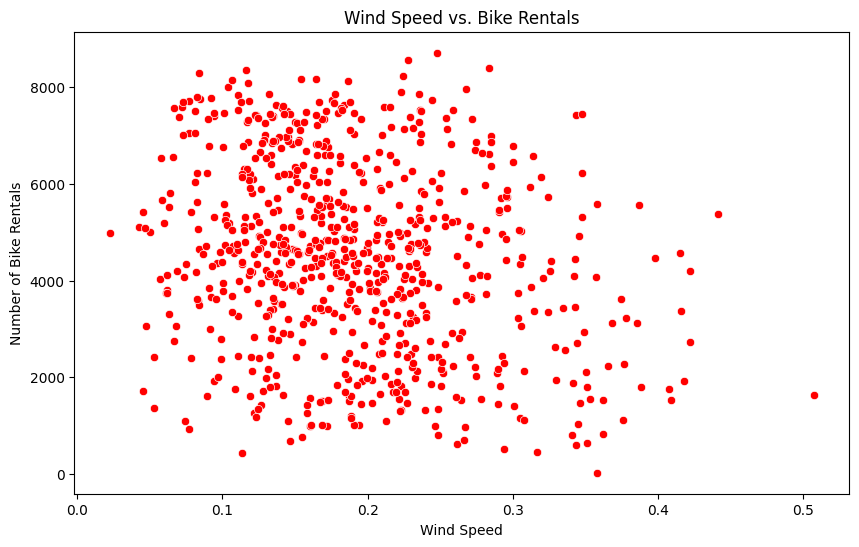

<ipython-input-8-65e3213e18ed>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df, palette='coolwarm')


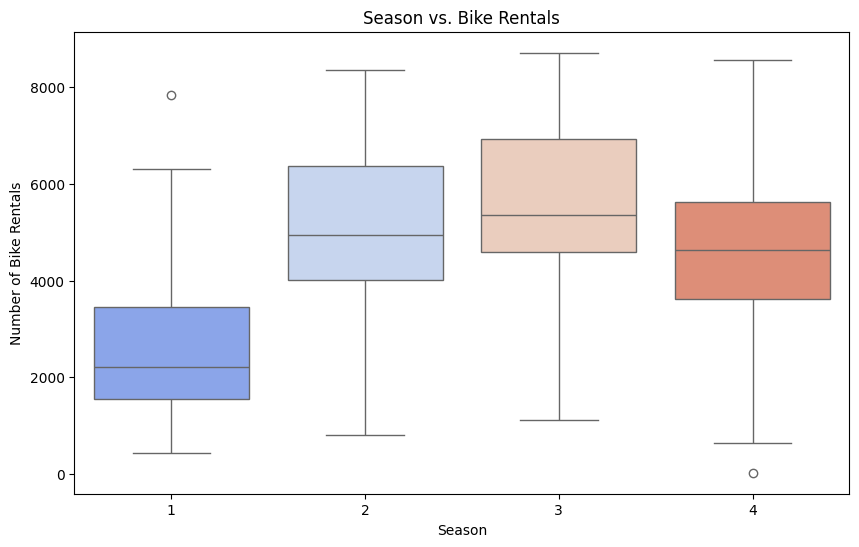

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of the target variable (cnt)
plt.figure(figsize=(8, 6))
sns.histplot(df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bike Rentals (cnt)')
plt.xlabel('Number of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap
# We can use a heatmap to visualize how features correlate with each other.
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

# 3. Scatter plots for features against the target (cnt)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, color='green')
plt.title('Temperature vs. Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Number of Bike Rentals')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df, color='red')
plt.title('Wind Speed vs. Bike Rentals')
plt.xlabel('Wind Speed')
plt.ylabel('Number of Bike Rentals')
plt.show()

# 4. Box Plot for Features (e.g., windspeed and temp) against the target
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df, palette='coolwarm')
plt.title('Season vs. Bike Rentals')
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Initialize models
lr = LinearRegression()
knn = KNeighborsRegressor()
xgb = XGBRegressor()


# Train models
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate using Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Linear Regression MSE: {mse_lr}")
print(f"KNN MSE: {mse_knn}")
print(f"XGBoost MSE: {mse_xgb}")

# Evaluate using R-squared (R²)
r2_lr = r2_score(y_test, y_pred_lr)
r2_knn = r2_score(y_test, y_pred_knn)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_xgb=r2_score(y_test,y_pred_log)
print(f"Linear Regression R²: {r2_lr}")
print(f"KNN R²: {r2_knn}")
print(f"XGBoost R²: {r2_xgb}")



Linear Regression MSE: 691035.0082022651
KNN MSE: 680884.8653061223
XGBoost MSE: 386231.25
Linear Regression R²: 0.8276670090367212
KNN R²: 0.8301982910459316
XGBoost R²: 0.7326155025555678


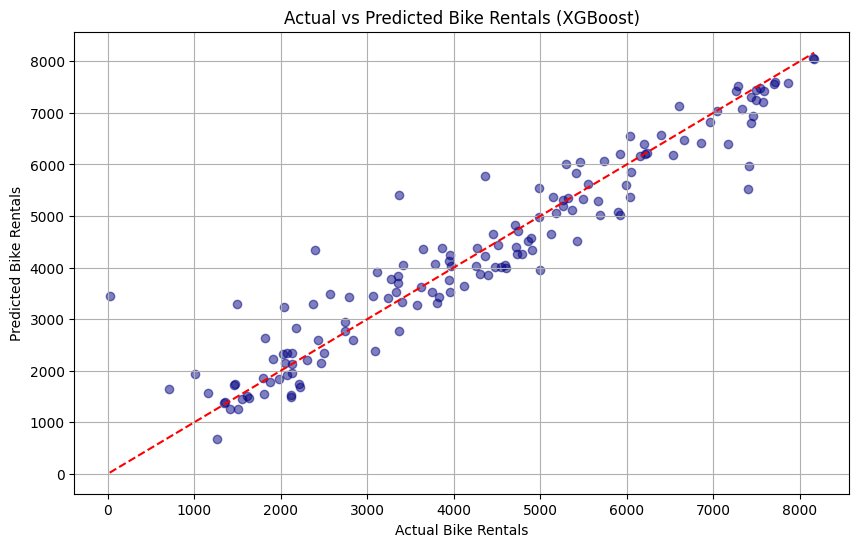

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for the best model (e.g., XGBoost)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='navy')
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.title("Actual vs Predicted Bike Rentals (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Cross-validation (5 folds in this case)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mean of the negative MSE scores
mean_cv_score = cv_scores.mean()

print(f"Mean Cross-Validation MSE: {-mean_cv_score}")


Mean Cross-Validation MSE: 587944.95


In [ ]:
# Fit the XGBoost model to the training data
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Model ko test set pe evaluate karna
y_pred = model.predict(X_test)  # X_test: test data ke features

# MSE (Mean Squared Error) aur R² score calculate karna
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results print karna
print(f"Final Test Set MSE: {mse}")
print(f"Final Test Set R²: {r2}")


Final Test Set MSE: 386231.25
Final Test Set R²: 0.903680145740509


In [ ]:
# Example of future data with 11 features
# [hour, temperature, humidity, day_of_week, season, ...] (total 11 features)
future_data = [[12, 20, 60, 2, 1, 10, 25, 5, 1, 0, 100]]  # 11 features here
future_prediction = model.predict(future_data)

# Future prediction print karna
print(f"Predicted bike rentals for future data: {future_prediction[0]}")


Predicted bike rentals for future data: 5540.8447265625


*FINAL PREDICTION AFTER TRAINING AND TESTING FOR NEW DATA*
   **Predicted bike rentals for future data: 5540.8447265625**



# Here is the comparison after testing:
 actual vs predicted based on new data

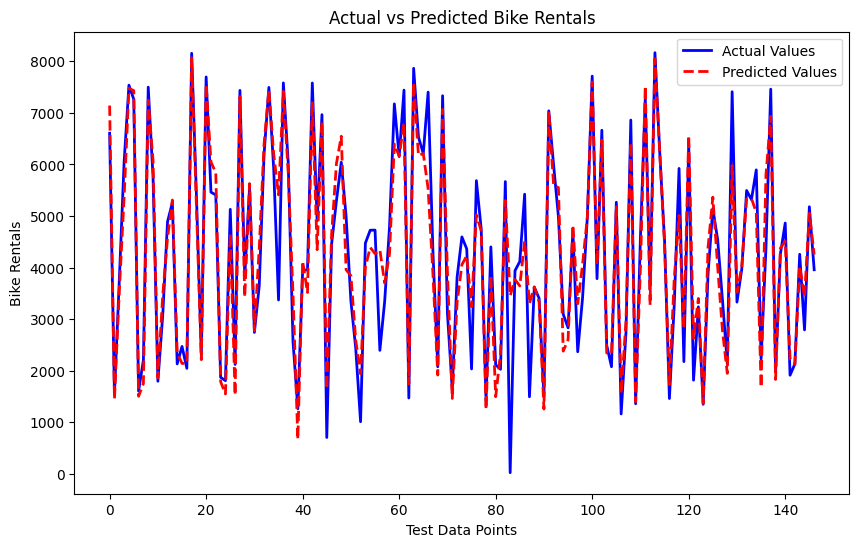

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Line plot for actual values
plt.plot(y_test.values, label='Actual Values', color='blue', linewidth=2)

# Line plot for predicted values
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--', linewidth=2)

# Graph Title
plt.title('Actual vs Predicted Bike Rentals')

# Labels
plt.xlabel('Test Data Points')
plt.ylabel('Bike Rentals')

# Legends to differentiate actual and predicted lines
plt.legend()

# Show the plot
plt.show()
